In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the dataset
file_path = ('/content/Mall_Customers.csv')
data = pd.read_csv(file_path)

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
data['Gender'].value_counts()

,count
Gender,
Female,112
Male,88


Text(0.5, 1.0, 'Age Distribution')

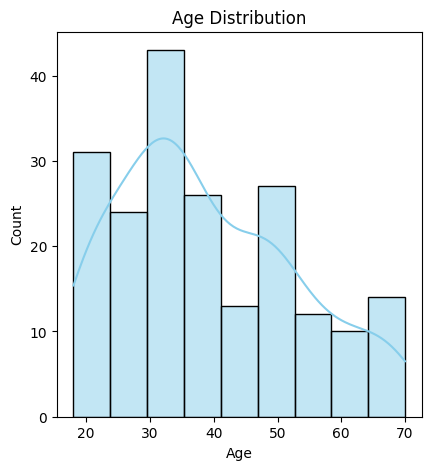

In [ ]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.histplot(data['Age'], kde=True, color='skyblue')
plt.title('Age Distribution')

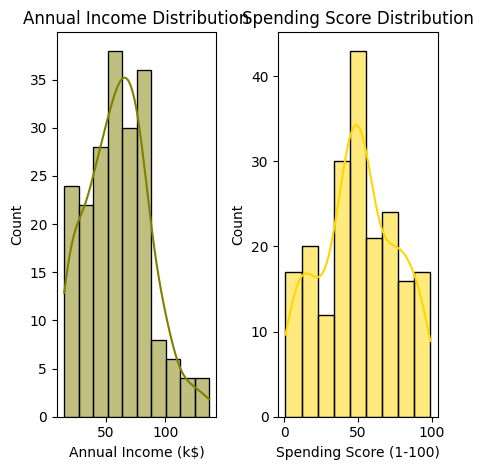

In [ ]:
plt.subplot(1, 3, 2)
sns.histplot(data['Annual Income (k$)'], kde=True, color='olive')
plt.title('Annual Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(data['Spending Score (1-100)'], kde=True, color='gold')
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()


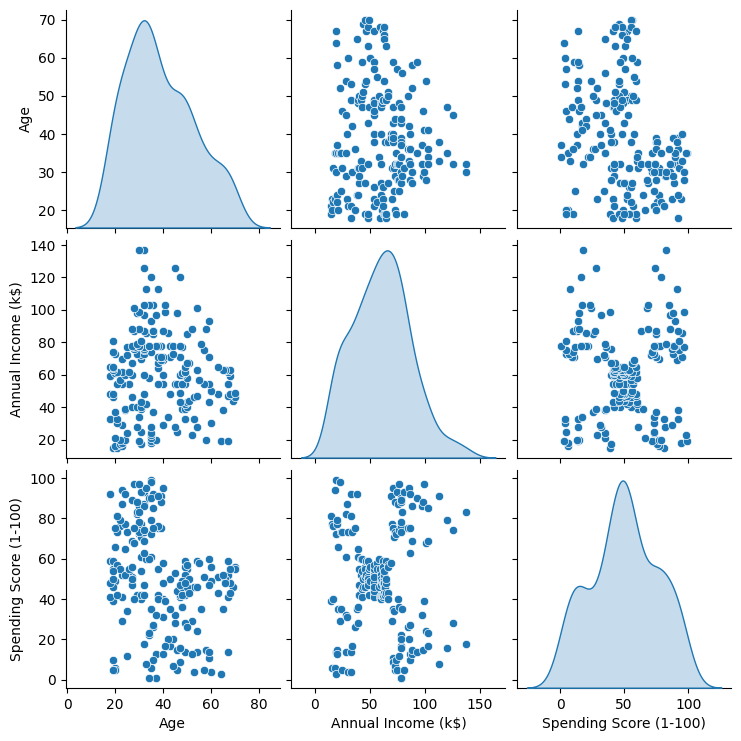

In [ ]:
sns.pairplot(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], diag_kind='kde')
plt.show()

In [ ]:
# Selecting the features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

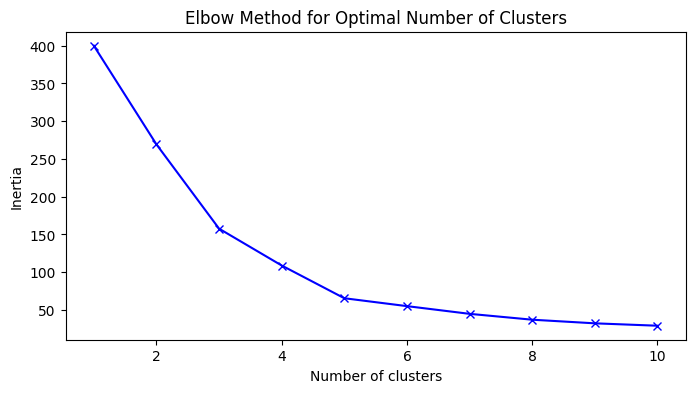

In [ ]:
# Finding the optimal number of clusters using the elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [ ]:
# Assuming the elbow point suggests 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X_scaled)

# Adding the cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


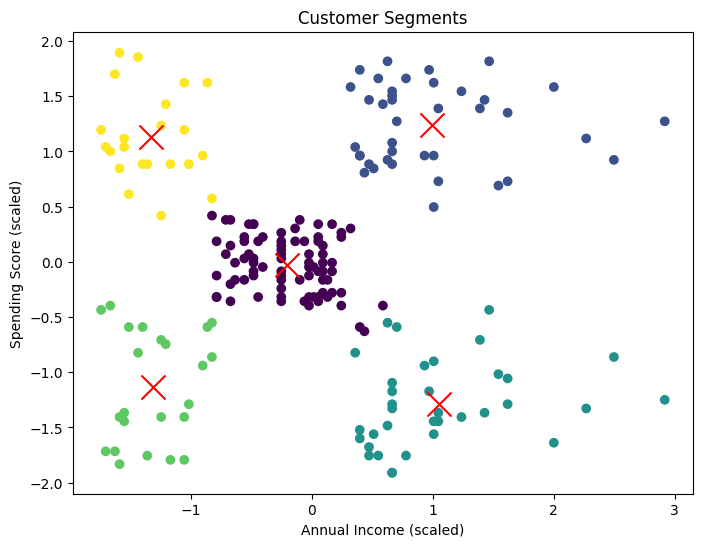

In [ ]:
# Visualizing the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Customer Segments')
plt.show()


In [ ]:
# Analyzing the clusters
print("\nCluster Analysis:")
print(data.groupby('Cluster').mean(numeric_only=True)) # Tell mean() to only consider numeric columns


Cluster Analysis:
         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         86.320988  42.716049           55.296296               49.518519
1        162.000000  32.692308           86.538462               82.128205
2        164.371429  41.114286           88.200000               17.114286
3         23.000000  45.217391           26.304348               20.913043
4         23.090909  25.272727           25.727273               79.363636


In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for the chosen number of clusters
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f'Silhouette Score for {kmeans.n_clusters} clusters: {silhouette_avg:.3f}')


Silhouette Score for 5 clusters: 0.555


In [ ]:
# Extract the cluster centers and scale them back to original data range
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['Annual Income (k$)', 'Spending Score (1-100)'])

print("\nCluster Centers:")
print(cluster_centers_df)


Cluster Centers:
   Annual Income (k$)  Spending Score (1-100)
0           55.296296               49.518519
1           86.538462               82.128205
2           88.200000               17.114286
3           26.304348               20.913043
4           25.727273               79.363636


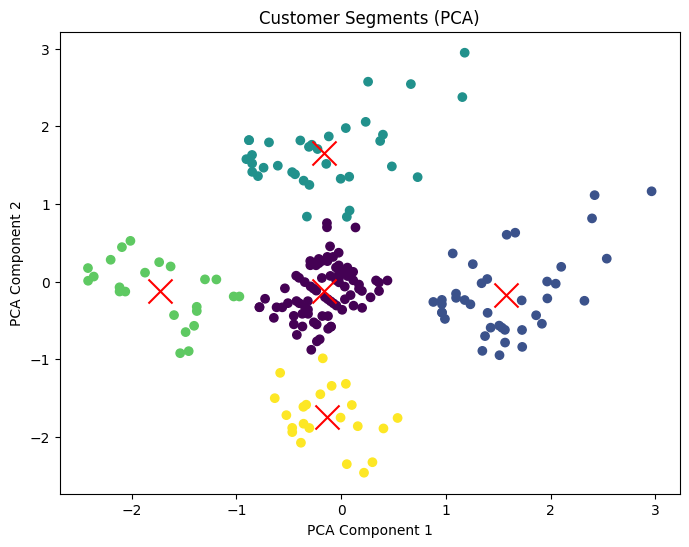

In [ ]:
from sklearn.decomposition import PCA

# Reduce the data to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizing the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1],
            s=300, c='red', marker='x')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segments (PCA)')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

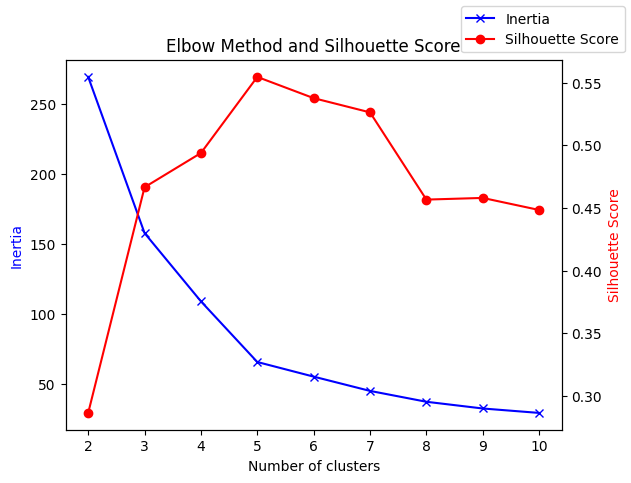

In [ ]:
inertia = []
silhouette_scores = []

for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plotting inertia and silhouette scores together
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(range(2, 11), inertia, 'bx-', label='Inertia')
ax2.plot(range(2, 11), silhouette_scores, 'ro-', label='Silhouette Score')

ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color='b')
ax2.set_ylabel('Silhouette Score', color='r')

plt.title('Elbow Method and Silhouette Score')
fig.legend(loc='upper right')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


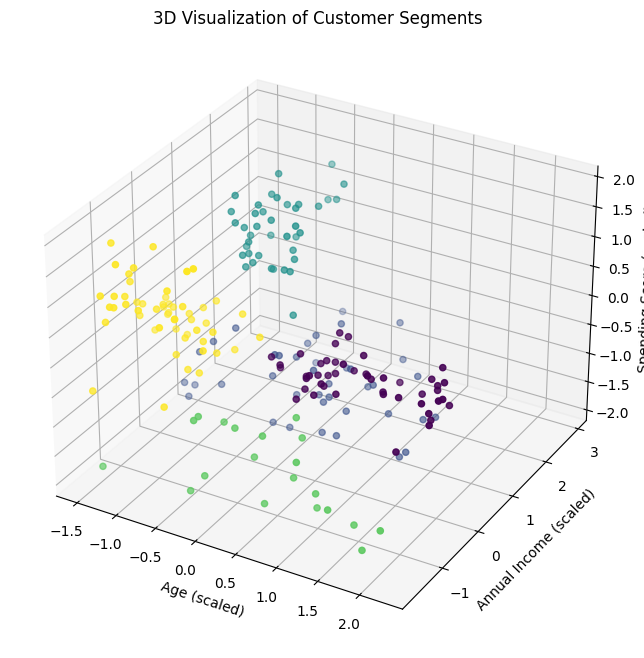

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# If you have three features, e.g., Age, Annual Income, and Spending Score
X_3d = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X_3d_scaled = scaler.fit_transform(X_3d)

kmeans_3d = KMeans(n_clusters=5, random_state=0)
kmeans_3d.fit(X_3d_scaled)

# 3D Visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d_scaled[:, 0], X_3d_scaled[:, 1], X_3d_scaled[:, 2],
           c=kmeans_3d.labels_, cmap='viridis', marker='o')
ax.set_xlabel('Age (scaled)')
ax.set_ylabel('Annual Income (scaled)')
ax.set_zlabel('Spending Score (scaled)')
ax.set_title('3D Visualization of Customer Segments')
plt.show()


Cluster Distribution by Gender:
Gender   Female  Male
Cluster              
0            48    33
1            21    18
2            16    19
3            14     9
4            13     9


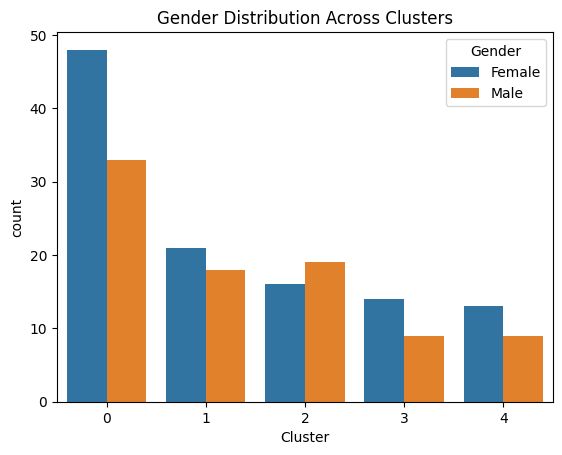

In [ ]:
# Analyzing clusters with respect to Gender
print("\nCluster Distribution by Gender:")
print(data.groupby(['Cluster', 'Gender']).size().unstack())

# Visualizing the gender distribution across clusters
sns.countplot(x='Cluster', hue='Gender', data=data)
plt.title('Gender Distribution Across Clusters')
plt.show()


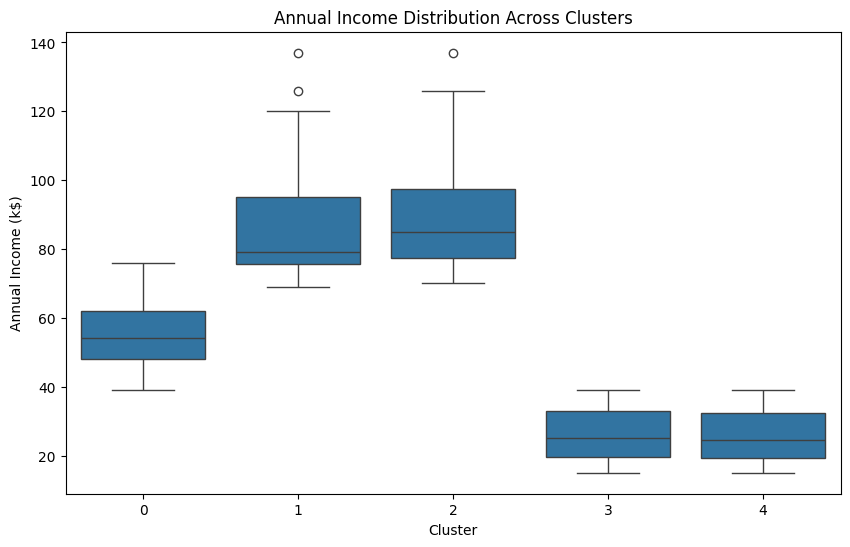

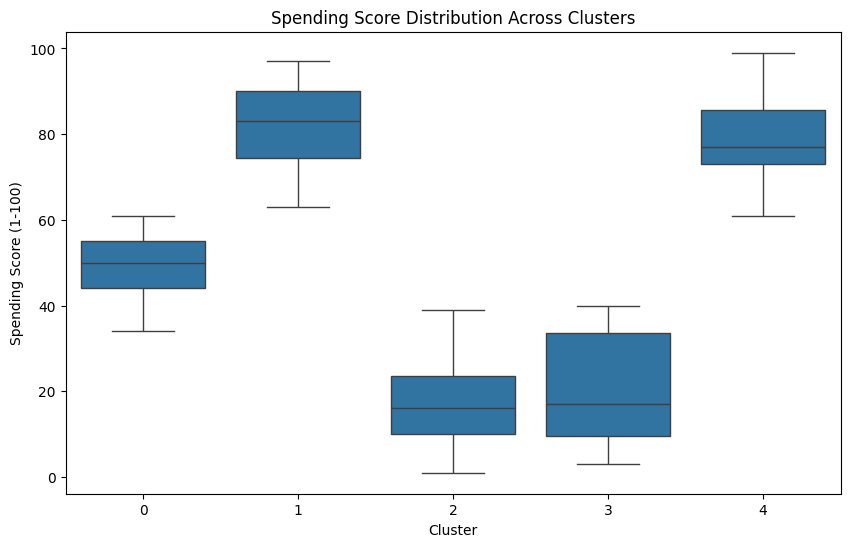

In [ ]:
# Boxplot for Annual Income across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=data)
plt.title('Annual Income Distribution Across Clusters')
plt.show()

# Boxplot for Spending Score across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=data)
plt.title('Spending Score Distribution Across Clusters')
plt.show()


Columns in the DataFrame: Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster'],
      dtype='object')
Unique values in 'Gender' column: ['Male' 'Female']


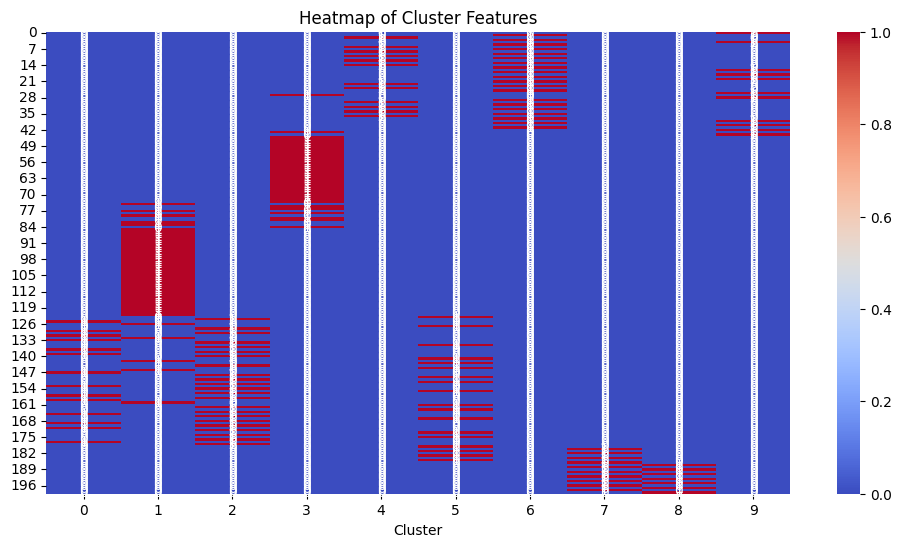

In [ ]:
# Check for the 'Cluster' column
print("Columns in the DataFrame:", data.columns)

# If 'Cluster' column is missing, you need to assign cluster labels from your KMeans model
# Assuming 'kmeans' is your fitted KMeans model
if 'Cluster' not in data.columns:
    data['Cluster'] = kmeans.labels_

# Check the unique values in the 'Gender' column
print("Unique values in 'Gender' column:", data['Gender'].unique())

# Create a pivot table to get a 2D representation of cluster assignments
cluster_pivot = data.pivot_table(index=data.index, columns='Cluster', values='CustomerID', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_pivot, annot=True, cmap='coolwarm') # Use the pivot table for the heatmap
plt.title('Heatmap of Cluster Features')
plt.show()

# If you see concatenated strings, you need to fix